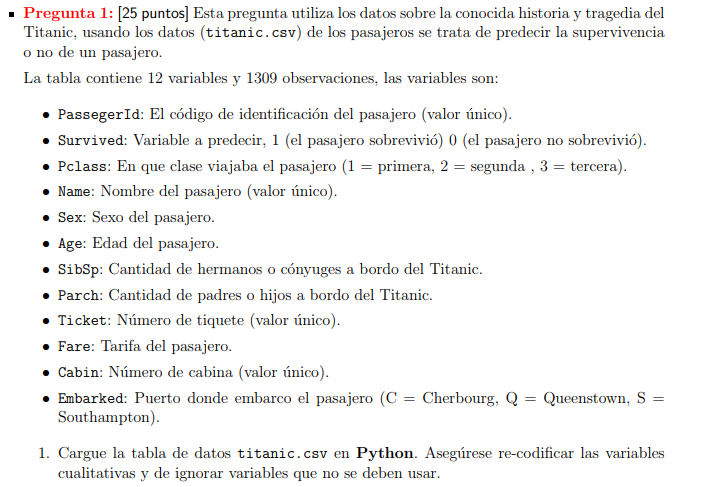

In [4]:
import os
import pandas as pd
import numpy as np
import mglearn
from sklearn.model_selection import train_test_split
from   sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential      
from keras.layers import Dense
from keras.layers import Reshape
from   sklearn.metrics import confusion_matrix

os.chdir("/Users/Andrey/Desktop/Data-Science-Course/VIII Lecture")

pd.set_option('display.max_rows', 1000)

datos = pd.read_csv('titanic.csv',delimiter=',',decimal=".",index_col=0)

def recodificar(col, nuevo_codigo):
  col_cod = pd.Series(col, copy=True)
  for llave, valor in nuevo_codigo.items():
    col_cod.replace(llave, valor, inplace=True)
  return col_cod

datos["Survived"] = recodificar(datos["Survived"], {0 : 'No', 1: 'Yes'})

datos['Pclass'] = datos['Pclass'].astype('category')
datos['Sex'] = datos['Sex'].astype('category')
datos['Embarked'] = datos['Embarked'].astype('category')

datos["Sex"] = datos["Sex"].cat.codes
datos["Embarked"] = datos["Embarked"].cat.codes
datos["Pclass"] = datos["Pclass"].cat.codes

datos['Sex'] = datos['Sex'].astype('category')
datos['Embarked'] = datos['Embarked'].astype('category')
datos['Pclass'] = datos['Pclass'].astype('category')

del[datos["Name"]]
del[datos["Ticket"]]
del[datos["Cabin"]]

#Imputando la edad con la moda
#Imputando la edad con la moda
datos = datos.fillna(np.mean(datos))

print(datos.head())

print(datos.info())

Using TensorFlow backend.


            Survived Pclass Sex   Age  SibSp  Parch     Fare Embarked
PassengerId                                                          
1                 No      2   1  22.0      1      0   7.2500        2
2                Yes      0   0  38.0      1      0  71.2833        0
3                Yes      2   0  26.0      0      0   7.9250        2
4                Yes      0   0  35.0      1      0  53.1000        2
5                 No      2   1  35.0      0      0   8.0500        2
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 8 columns):
Survived    1309 non-null object
Pclass      1309 non-null category
Sex         1309 non-null category
Age         1309 non-null float64
SibSp       1309 non-null int64
Parch       1309 non-null int64
Fare        1309 non-null float64
Embarked    1309 non-null category
dtypes: category(3), float64(2), int64(2), object(1)
memory usage: 65.6+ KB
None


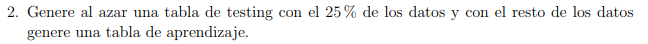

In [5]:
#1.b

# Se dejan las variables predictorias en una tabla

X = datos.iloc[:,1:] 
print(X.head())

# Se separa las variablea a predecir

y = datos.iloc[:,0:1] 
print(y.head())

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=0)

print(X_train.head())

print(X_test.head())

print(y_train.head())

print(y_test.head())

            Pclass Sex   Age  SibSp  Parch     Fare Embarked
PassengerId                                                 
1                2   1  22.0      1      0   7.2500        2
2                0   0  38.0      1      0  71.2833        0
3                2   0  26.0      0      0   7.9250        2
4                0   0  35.0      1      0  53.1000        2
5                2   1  35.0      0      0   8.0500        2
            Survived
PassengerId         
1                 No
2                Yes
3                Yes
4                Yes
5                 No
            Pclass Sex        Age  SibSp  Parch     Fare Embarked
PassengerId                                                      
748              1   0  30.000000      0      0  13.0000        2
566              2   1  24.000000      2      0  24.1500        2
83               2   0  29.881138      0      0   7.7875        1
568              2   0  29.000000      0      4  21.0750        2
864              2   0  29.881

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


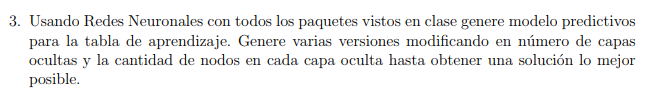

In [6]:
#100 nodos
instancia_red = MLPClassifier(solver='lbfgs', random_state=0)

instancia_red.fit(X_train,y_train)

print("Precisión en Testing: {:.3f}".format(instancia_red.score(X_test, y_test)))

# 50 capas, 50 nodos
instancia_red = MLPClassifier(solver='lbfgs', random_state=0,hidden_layer_sizes=[50, 50])

instancia_red.fit(X_train,y_train)

print("Precisión en Testing: {:.3f}".format(instancia_red.score(X_test, y_test)))


# 500 capas, 500 nodos
instancia_red = MLPClassifier(solver='lbfgs', random_state=0,hidden_layer_sizes=[500, 500])

instancia_red.fit(X_train,y_train)

print("Precisión en Testing: {:.3f}".format(instancia_red.score(X_test, y_test)))


#1000 capas, 1000 nodos

instancia_red = MLPClassifier(solver='lbfgs', random_state=0,hidden_layer_sizes=[1000, 1000])

instancia_red.fit(X_train,y_train)

print("Precisión en Testing: {:.3f}".format(instancia_red.score(X_test, y_test)))

#Mejor resultado

instancia_red = MLPClassifier(solver='lbfgs', random_state=0,hidden_layer_sizes=[64, 53])

instancia_red.fit(X_train,y_train)

print("Precisión en Testing: {:.3f}".format(instancia_red.score(X_test, y_test)))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:916: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Precisión en Testing: 0.872


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:916: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Precisión en Testing: 0.878


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:916: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Precisión en Testing: 0.875


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:916: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Precisión en Testing: 0.872


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:916: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Precisión en Testing: 0.890


In [7]:
#Version de KERAS

dummy_y = pd.get_dummies(y)
dummy_X = pd.get_dummies(X)

print(dummy_X.head())
print(dummy_y.head())

scaler = MinMaxScaler(feature_range = (0, 1))
scaled_dummy_X  = pd.DataFrame(scaler.fit_transform(dummy_X), columns = list(dummy_X))

X_train, X_test, y_train, y_test = train_test_split(scaled_dummy_X, dummy_y, train_size=0.75, random_state = 0)

print(X_train.head())
print(X_test.head())

print(y_train.head())
print(y_test.head())

model = Sequential()
model.add(Dense(26, input_dim = 13, activation = 'relu'))  # Agregamos primera capa oculta
model.add(Dense(11, activation = 'relu'))  # Agregamos primera capa oculta
model.add(Dense(6, activation = 'relu'))  # Agregamos tercera capa oculta
model.add(Dense(2, activation = 'sigmoid')) # Agregamos capa output

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

print(model.summary())

model.fit(X_train, y_train, epochs = 78, batch_size = 10, verbose = 0)

y_pred = np.round(model.predict(X_test))  # Redondeamos pues obtenemos un número entre 0 y 1

scores = model.evaluate(X_test, y_test)

print(model.metrics_names[1], scores[1])

              Age  SibSp  Parch     Fare  Pclass_0  Pclass_1  Pclass_2  Sex_0  \
PassengerId                                                                     
1            22.0      1      0   7.2500         0         0         1      0   
2            38.0      1      0  71.2833         1         0         0      1   
3            26.0      0      0   7.9250         0         0         1      1   
4            35.0      1      0  53.1000         1         0         0      1   
5            35.0      0      0   8.0500         0         0         1      0   

             Sex_1  Embarked_-1  Embarked_0  Embarked_1  Embarked_2  
PassengerId                                                          
1                1            0           0           0           1  
2                0            0           1           0           0  
3                0            0           0           0           1  
4                0            0           0           0           1  
5           

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


328/328 [==============================] - 0s 113us/step
acc 0.8810975609756098


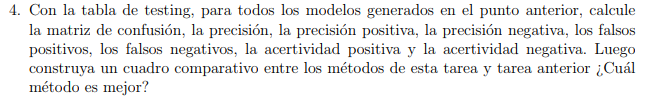

In [4]:

def indices_general(MC, nombres = None):
    precision_global = np.sum(MC.diagonal()) / np.sum(MC)
    error_global = 1 - precision_global
    precision_categoria  = pd.DataFrame(MC.diagonal()/np.sum(MC,axis = 1)).T
    if nombres!=None:
        precision_categoria.columns = nombres
    return {"Matriz de Confusión":MC, 
            "Precisión Global":precision_global, 
            "Error Global":error_global, 
            "Precisión por Categoría":precision_categoria}
    
def precisiones(MC):
    VN = MC[0][0]
    FP = MC[0][1]
    FN = MC[1][0]
    VP = MC[1][1]
    
    return {"Precision Global": (VN + VP) / (VN + FP + FN + VP), 
            "Precisión Positiva": VP / (FN + VP), 
            "Precisión Negativa": VN / (VN + FP), 
            "Precisión Falsos Positivos": FP / (VN + FP),
            "Precisión Falsos Negativos": FN / (VP + FN),
            "Asertividad Positiva": VP / (FP + VP),
            "Asertividad Negativa": VN / (FN + VN)}

def resumenMatrizPrecisiones(instancia, X_testP, y_testP, yP):
    prediccion = instancia.predict(X_testP)
    MC = confusion_matrix(y_testP, prediccion)
    indices = indices_general(MC,list(np.unique(yP)))
    
    for k in indices:
        print("\n%s:\n%s"%(k,str(indices[k])))
    
    #Extrayendo precisiones

    p = precisiones(MC)

    for k in p:
        print("\n%s:\n%s"%(k,str(p[k])))
        
print("Matriz de confusion y precisiones")

resumenMatrizPrecisiones(instancia_red, X_test, y_test, y)

Matriz de confusion y precisiones

Matriz de Confusión:
[[158  22]
 [ 17 131]]

Precisión Global:
0.8810975609756098

Error Global:
0.11890243902439024

Precisión por Categoría:
         No       Yes
0  0.877778  0.885135

Precision Global:
0.8810975609756098

Precisión Positiva:
0.8851351351351351

Precisión Negativa:
0.8777777777777778

Precisión Falsos Positivos:
0.12222222222222222

Precisión Falsos Negativos:
0.11486486486486487

Asertividad Positiva:
0.8562091503267973

Asertividad Negativa:
0.9028571428571428


## Este modelo es muy efectivo ya que su precisión es muy alta tanto para sobrevivientes como no sobrevivientes. Ademas el porcentaje de falsos negativos y positivos es bajo, mientras que las asertividades son mas altas.

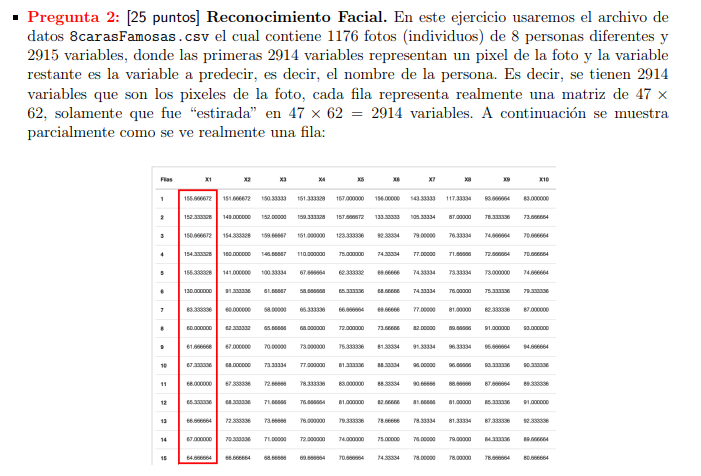

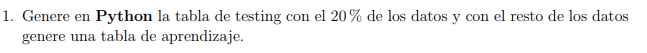

In [10]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mglearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import math
import random
from   sklearn.datasets import make_blobs
# Import the dendrogram function and the ward, single, complete, average, linkage and fcluster clustering function from SciPy
from scipy.cluster.hierarchy import dendrogram, ward, single, complete,average,linkage, fcluster
from scipy.spatial.distance import pdist
from sklearn.utils.multiclass import unique_labels
    
os.chdir("/Users/Andrey/Desktop/Data-Science-Course/VII Lecture")

pd.set_option('display.max_rows', 1000)

datos_caras = pd.read_csv('8carasFamosas.csv',delimiter=';',decimal=".",index_col=0)


print(datos_caras.head())


def centroide(num_cluster, datos, clusters):
  ind = clusters == num_cluster
  return(pd.DataFrame(datos[ind].mean()).T)

    
def plot_image(valor_cara, titulo = None, filas = 62, cols = 47):
    image = np.array(list(reversed(valor_cara)))
    image = pd.to_numeric(image, errors = 'coerce')
    image = image.reshape(filas, cols)
    plt.imshow(image, cmap = "pink")
    ejes = plt.gca()
    ejes.axes.get_xaxis().set_visible(False)
    ejes.axes.get_yaxis().set_visible(False)
    if titulo is not None:
        plt.title(titulo)
        
#plot_image(datos_caras.iloc[0, range(2914)], datos_caras.iloc[0, range(2914)])

    
X = datos_caras.iloc[:, :-1]

print(X.head())
    
y = datos_caras.iloc[:,-1]

print(y.head())


X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

                  pix2        pix3        pix4        pix5        pix6  \
pix1                                                                     
155.666672  152.333328  150.666672  154.333328  155.333328  130.000000   
160.333328  128.666672   93.000000   65.000000   48.333332   44.000000   
24.333334    20.333334   17.333334   16.000000   33.333332   55.333332   
57.000000   147.000000  197.000000  209.666672  228.333328  237.666672   
12.666667    62.666668  158.333328  189.000000  183.666672  183.333328   

                  pix7        pix8        pix9       pix10       pix11  ...  \
pix1                                                                    ...   
155.666672   83.333336   60.000000   61.666668   67.333336   68.000000  ...   
160.333328   34.333332   40.666668   99.000000  131.666672  127.000000  ...   
24.333334    59.000000   54.666668   39.000000   27.000000   27.000000  ...   
57.000000   233.333328  224.666672  181.333328  143.333328  140.333328  ...   
12.6666

C:\Users\Andrey\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


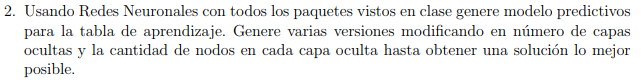

In [12]:
#2b

instancia_red = MLPClassifier(solver='lbfgs', random_state=0)
print(instancia_red)

instancia_red.fit(X_train,y_train)

print("Precisión en Testing: {:.3f}".format(instancia_red.score(X_test, y_test)))

# 50 capas, 50 nodos
instancia_red = MLPClassifier(solver='lbfgs', random_state=0,hidden_layer_sizes=[50, 50])

instancia_red.fit(X_train,y_train)

print("Precisión en Testing: {:.3f}".format(instancia_red.score(X_test, y_test)))


# 500 capas, 500 nodos
instancia_red = MLPClassifier(solver='lbfgs', random_state=0,hidden_layer_sizes=[500, 500])

instancia_red.fit(X_train,y_train)

print("Precisión en Testing: {:.3f}".format(instancia_red.score(X_test, y_test)))


#1000 capas, 1000 nodos

instancia_red = MLPClassifier(solver='lbfgs', random_state=0,hidden_layer_sizes=[1000, 1000])

instancia_red.fit(X_train,y_train)

print("Precisión en Testing: {:.3f}".format(instancia_red.score(X_test, y_test)))

#Mejor resultado 61 * 61 = 0.805

instancia_red = MLPClassifier(solver='lbfgs', random_state=0,hidden_layer_sizes=[61, 61])

instancia_red.fit(X_train,y_train)

print("Precisión en Testing: {:.3f}".format(instancia_red.score(X_test, y_test)))

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=0, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)
Precisión en Testing: 0.394
Precisión en Testing: 0.352
Precisión en Testing: 0.352
Precisión en Testing: 0.394
Precisión en Testing: 0.805


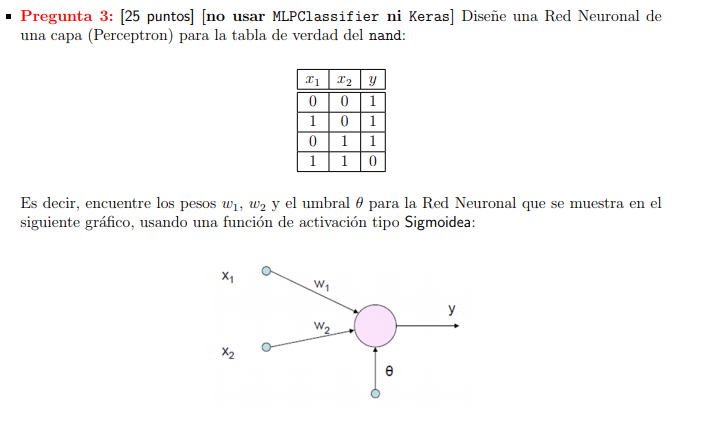

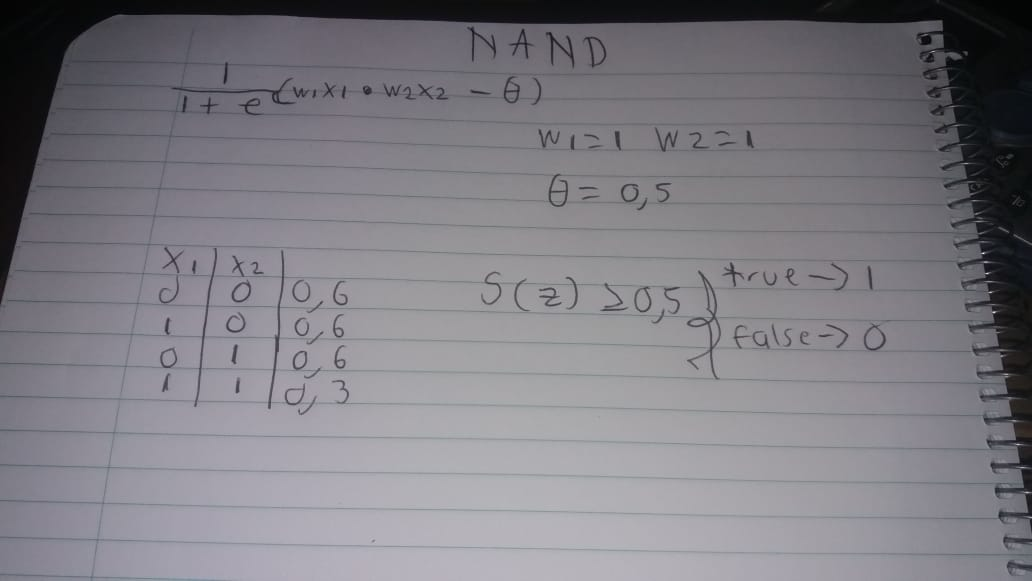

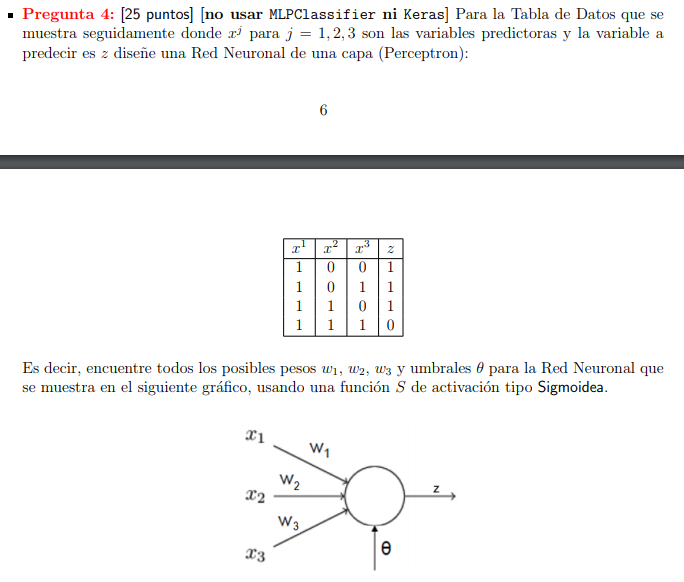

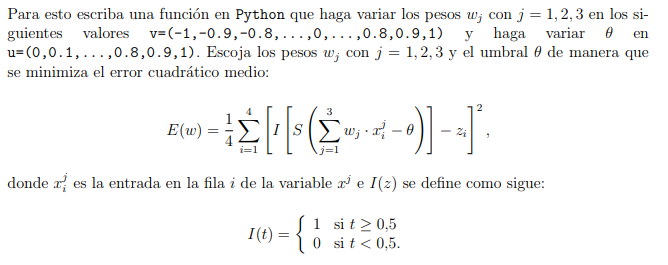

In [3]:
#Ejercicio 4
u = np.arange(0, 1.1, 0.1)

v = np.arange(-1, 0, 0.1)

v = np.append(v, u)

w = np.empty(3) 
w.fill(0)

tabla = np.array([[1, 0, 0, 1], [1, 0, 1, 1], [1, 1, 0, 1], [1, 1, 1, 0]]) 

#I(t)
def identity(value, compare):
    return 1 if value >= compare else 0

def sigmoidea(w, tabla, sigma, i):
    result = 0
    for j in range(0, len(w)):
        result += w[j] * tabla[i][j] - sigma
    return result

def sumatoria(w, tabla, sigma, compare):
    result = 0
    z_final = []
    for i in range(0, len(tabla[0])):
        result += sigmoidea(w, tabla, sigma, i)
        t = result - tabla[i][3]
        t = 1/4 * t ** 2
        z_final.append(identity(t, compare))
    return z_final
            

for valor_sigma in v:
    for peso_w in u:
        w.fill(peso_w)
        z = sumatoria(w, tabla, valor_sigma, 0.5) 
        if((z == tabla[ : , 3]).all()):
            print("Valido")
            print(z)
            print(peso_w)
            print(valor_sigma)

Valido
[1, 1, 1, 0]
0.30000000000000004
0.30000000000000004
Valido
[1, 1, 1, 0]
0.4
0.30000000000000004
Valido
[1, 1, 1, 0]
0.5
0.4
Valido
[1, 1, 1, 0]
0.6000000000000001
0.4
Valido
[1, 1, 1, 0]
0.6000000000000001
0.5
Valido
[1, 1, 1, 0]
0.7000000000000001
0.5
Valido
[1, 1, 1, 0]
0.8
0.5
Valido
[1, 1, 1, 0]
0.8
0.6000000000000001
Valido
[1, 1, 1, 0]
0.9
0.6000000000000001
Valido
[1, 1, 1, 0]
0.9
0.7000000000000001
Valido
[1, 1, 1, 0]
1.0
0.7000000000000001
